In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
#import csv
import seaborn as sns

In [66]:
data_fn = '/Users/mattf/Documents/Spr19/448/final/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutliers.counts.matrix.tsv'
data = pd.read_table(data_fn, sep = '\t', header = 0, index_col = 0)
data # genes are rows. samples are columns

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,225.00,252.00,136.00,166.00,207.00,121.00,127.00,304.00,227.00,224.00,...,132.00,149.00,186.00,71.00,272.00,136.00,324.00,158.00,168.00,167.00
ENSG00000000005,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,4.00,0.00,...,0.00,0.00,3.00,1.00,1.00,1.00,1.00,2.00,1.00,0.00
ENSG00000000419,254.00,301.00,173.00,264.00,307.00,140.00,164.00,279.00,216.00,274.00,...,369.00,148.00,265.00,86.00,326.00,283.00,300.00,242.00,286.00,207.00
ENSG00000000457,422.99,510.00,272.00,301.00,417.00,116.00,198.00,278.00,243.00,297.00,...,274.00,163.00,227.00,96.00,418.00,338.00,277.00,342.00,343.00,140.00
ENSG00000000460,272.00,310.00,204.00,224.00,227.00,149.00,253.00,171.00,274.00,198.00,...,280.00,168.00,308.00,86.00,284.00,260.00,179.00,210.00,225.00,124.00
ENSG00000000938,21.00,12.00,21.00,11.00,16.00,34.00,15.00,19.00,17.00,18.00,...,21.00,14.00,9.00,21.00,17.00,11.00,17.00,29.00,10.00,12.00
ENSG00000000971,165.00,178.96,111.49,181.77,244.00,230.67,196.97,264.92,179.72,163.48,...,136.07,199.33,215.67,56.00,299.43,151.80,147.81,174.00,211.66,162.70
ENSG00000001036,107.00,150.00,94.00,78.00,114.00,79.00,58.00,192.00,121.00,155.00,...,65.00,112.00,108.00,33.00,94.00,80.00,115.00,109.00,78.00,94.00
ENSG00000001084,449.00,624.00,219.00,583.00,499.00,354.00,453.00,428.00,345.00,486.00,...,840.00,264.00,681.00,126.00,485.00,361.00,359.00,358.00,422.00,284.00
ENSG00000001167,757.00,872.00,643.00,698.00,627.00,618.00,625.00,520.00,702.00,386.00,...,892.00,460.00,641.00,309.00,540.00,496.00,469.00,526.00,625.00,1050.00


In [67]:
cells = list(data)
print(cells, len(cells))
contained = data > 6
data = data[contained.sum(axis=1) >= 91]
data = np.transpose(data) #????
data = np.log(data + 1)
data = pd.DataFrame(scale(data))
data

['100_2', '101_3', '102_2', '103_3', '104_2', '105_2', '106_4', '107_4', '109_1', '11_4', '110_3', '111_2', '112_2', '113_2', '114_3', '115_1', '116_4', '117_1', '119_1', '120_1', '121_3', '122_2', '123_3', '124_4', '125_4', '126_1', '127_2', '128_3', '129_2', '130_3', '131_3', '132_3', '133_4', '134_2', '136_2', '137_1', '138_2', '139_1', '141_2', '142_1', '144_3', '145_1', '146_2', '147_2', '148_4', '149_1', '15_2', '150_4', '152_2', '153_1', '154_2', '155_3', '156_2', '157_4', '158_3', '159_3', '160_4', '161_2', '162_1', '163_1', '165_2', '166_2', '167_2', '168_2', '17_1', '171_2', '172_1', '173_1', '174_2', '176_2', '177_1', '178_4', '179_2', '18_1', '180_2', '181_2', '182_2', '183_2', '184_3', '185_2', '186_2', '187_2', '188_2', '189_1', '19_2', '190_2', '191_3', '192_2', '193_2', '196_3', '197_2', '198_4', '199_2', '2_1', '20_2', '200_2', '201_2', '202_3', '203_4', '204_3', '205_2', '206_3', '207_2', '208_3', '209_4', '21_2', '212_3', '215_2', '216_2', '217_1', '218_1', '219_2', 

,0,1,2,3,4,5,6,7,8,9,...,19336,19337,19338,19339,19340,19341,19342,19343,19344,19345
0,0.219780,0.017460,0.563355,0.239355,0.404737,-0.057676,-0.196651,-0.022059,0.410172,1.705169,...,1.571826,0.681712,1.089043,0.174307,0.989684,0.584217,-0.925668,1.547432,0.041796,0.589092
1,0.505310,0.516128,1.034378,0.560082,-0.467201,0.082977,0.623107,0.871981,0.791218,1.022247,...,0.417734,-0.018782,0.827470,0.612674,-0.113408,0.193640,1.688501,0.555062,-0.166687,-0.018208
2,-1.046653,-1.109233,-0.547555,-0.465641,0.404737,-0.735494,-0.510355,-1.969656,-0.029500,-0.410763,...,0.233969,0.080839,0.570154,0.565935,0.339740,0.165531,-3.228186,0.008720,-0.969006,-1.459888
3,-0.545668,0.130853,-0.292802,-0.236541,-0.599863,0.109966,-0.961460,0.687322,0.191576,0.219013,...,0.321691,0.322093,0.440343,-0.429481,0.575361,-2.023464,-0.494506,-1.505572,-0.527458,-0.385131
4,0.009793,0.574121,0.527450,-0.203944,-0.022585,0.620397,-0.043043,0.264685,-0.097368,0.641208,...,0.694763,-0.595289,0.443399,-0.601992,-1.429841,-0.596132,0.561109,0.660238,0.707594,-0.254469
5,-1.340039,-1.729152,-2.685652,-1.234410,1.174270,0.522947,-0.930693,-0.667420,-0.136308,-0.184898,...,1.772497,0.299882,0.851631,0.652797,-0.118231,0.132702,-1.045179,1.392912,-0.969006,0.333540
6,-1.218573,-1.265793,-1.345380,0.061821,-0.123063,0.249122,-1.675460,0.002025,-0.105973,-0.706310,...,-0.520334,-1.650787,-0.690504,-2.620381,0.058908,-1.702459,0.057604,-0.177612,-0.663979,-1.867901
7,0.978235,0.293161,-0.492696,-0.897593,0.246772,0.763125,1.223370,-0.152124,-0.601258,-0.395634,...,-1.401634,0.594635,-2.113731,0.343825,0.011832,-2.023464,-1.998298,-0.397995,-0.166687,-0.525853
8,0.242072,-0.458224,-0.830945,0.257319,0.072149,0.090318,0.101486,-0.737307,0.206969,-0.639740,...,-0.681275,-2.751304,-0.161017,0.079815,-1.579805,-0.568727,-0.388248,-0.397995,-0.279790,-0.192481
9,0.208561,0.240045,-0.326448,-0.538747,0.161759,-0.073700,0.702787,0.192988,-1.403331,-0.558672,...,-1.107032,0.412441,-0.858753,-2.128426,-0.897896,-2.023464,-2.254429,-2.343421,0.707594,-0.074474


In [89]:
pca = PCA(n_components=20) # reduce the dimensionality of the GENES
pca_samples = pca.fit_transform(data) # 10 min...
print(pca.explained_variance_ratio_)
print('SUM: ')
print(np.sum(pca.explained_variance_ratio_))
print(pca_samples.shape)

[0.44332671 0.1730408  0.03914092 0.02546878 0.02455123 0.01584427
 0.01203028 0.00913246 0.00858516 0.00771768 0.00647222 0.00504184
 0.00407332 0.00381529 0.00331318 0.00322493 0.00296977 0.00259604
 0.00249068 0.00234849]
SUM: 
0.7951840362108664
(453, 20)


In [72]:
ica = FastICA(n_components = 20, random_state = 3, max_iter = 2000)
ica_samples = ica.fit_transform(data) # 10 min...
print(ica_samples.shape)

(453, 20)


In [73]:
gmm = GaussianMixture(n_components = 4).fit(pca_samples)
gmm_clustered_pca = gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(gmm_clustered_pca)
z = zip(cells, gmm_clustered_pca)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = gmm_clustered_pca
t.to_csv('assignments_gmm_pca.csv')
gmm_clustered_pca

array([0, 2, 0, 3, 2, 0, 3, 3, 2, 3, 2, 0, 3, 2, 0, 2, 3, 3, 3, 3, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 0, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 2,
       0, 3, 2, 2, 2, 3, 2, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 3, 2, 2, 3, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 2, 3, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       0, 2, 0, 3, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 3, 0,

In [74]:
#gmm = GaussianMixture(n_components = 4).fit(data)
#gmm_clustered_noreduction = gmm.predict(data) # kmeans.fit_predict(pca_samples)
#len(gmm_clustered_noreduction)
#z = zip(cells, gmm_clustered_noreduction)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
#t = pd.DataFrame()
#t['sample'] = cells
#t['clusters'] = gmm_clustered_noreduction
#t.to_csv('assignments_gmm_noreduction.csv')
#gmm_clustered_noreduction

In [75]:
gmm = GaussianMixture(n_components = 4).fit(ica_samples)
gmm_clustered_ica = gmm.predict(ica_samples) # kmeans.fit_predict(pca_samples)
len(gmm_clustered_ica)
z = zip(cells, gmm_clustered_ica)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = gmm_clustered_ica
t.to_csv('assignments_gmm_ica.csv')
gmm_clustered_ica

array([0, 1, 0, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0,
       1, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3, 3, 2, 3, 3, 0, 1, 1, 1, 3, 3, 3,
       3, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 1, 0, 0, 2, 0, 1, 3, 1,
       0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 3, 0, 0, 3, 3, 0, 1, 1, 1, 0, 1, 3, 1, 3, 0, 1,
       2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 1,
       2, 1, 3, 2, 0, 0, 3, 3, 3, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 3, 1, 1, 0, 0, 0, 3, 0, 0,
       2, 0, 0, 3, 0, 3, 3, 0, 0, 1, 2, 0, 2, 2, 3, 0, 0, 1, 1, 0, 1, 3,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 2, 3, 1, 0, 0, 2, 0, 0,
       3, 0, 3, 0, 1, 1, 3, 0, 1, 3, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 0, 1, 3, 0, 3, 0, 2, 3, 3, 1, 3, 3, 0, 0, 3, 3, 1, 3, 0, 1, 3,
       1, 3, 1, 0, 3, 3, 3, 0, 0, 1, 1, 1, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 0, 0, 1, 1, 0, 3, 2, 0, 3, 0,

In [76]:
gmm.means_

array([[-5.80741853e-03, -1.35018606e-02, -8.92069031e-03,
         9.52904257e-03,  1.12573444e-02, -1.18043074e-03,
         1.35002137e-02, -1.00386961e-02, -1.02693309e-02,
        -8.89031855e-03,  3.82850435e-03,  1.06261294e-02,
        -3.23479390e-03,  4.68181130e-04,  2.28391236e-03,
         1.90675264e-03, -3.00054198e-03,  8.85683108e-03,
        -2.58998147e-02,  1.86023644e-03],
       [ 9.62602980e-03,  1.49801530e-02, -1.48973316e-02,
        -1.20694608e-02,  1.54928220e-02, -4.54485561e-03,
        -1.14634700e-02, -8.32553682e-03,  3.11652583e-03,
         2.06066528e-02,  6.09639082e-03,  8.45427682e-03,
         2.25016964e-02, -7.82291709e-03,  4.41820843e-03,
         5.37070391e-03, -6.99940853e-03, -4.36924936e-03,
         2.01178816e-02,  3.56658236e-04],
       [-1.29342084e-02,  3.67260823e-03, -4.01464495e-03,
         1.61960473e-02, -1.94361277e-02,  3.39692528e-02,
         1.69379816e-03,  1.96784359e-02, -4.48194869e-03,
         2.36632812e-03, -1.5

In [92]:
ap = AffinityPropagation(preference = -600000).fit(pca_samples)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_pca = ap.predict(pca_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_pca)
z = zip(cells, ap_clustered_pca)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_pca
t.to_csv('assignments_ap_pca.csv')
ap_clustered_pca

number clusters 4


array([0, 1, 3, 2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 2, 0, 1, 3, 2, 3, 3, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 2, 3, 2, 0, 3, 0, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       3, 0, 2, 2, 2, 3, 0, 0, 0, 3, 0, 1, 0, 3, 2, 0, 0, 3, 2, 2, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 3, 2, 0, 0,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 0, 2, 3, 3, 0, 3, 3, 2, 3, 3,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 1, 0,
       0, 0, 0, 0, 2, 2, 1, 3, 0, 0, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 3,
       2, 0, 0, 0, 0, 3, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0,
       1, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 2, 1, 1, 3, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0,

In [78]:
ap = AffinityPropagation(preference = -10000000000).fit(ica_samples)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_ica = ap.predict(ica_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_ica)
z = zip(cells, ap_clustered_ica)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_ica
t.to_csv('assignments_ap_ica.csv')
ap_clustered_ica

number clusters 453


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [79]:
ap = AffinityPropagation(preference = -400000).fit(data)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_noreduction = ap.predict(data) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_noreduction)
z = zip(cells, ap_clustered_noreduction)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_noreduction
t.to_csv('assignments_ap_noreduction.csv')
ap_clustered_noreduction

number clusters 4


array([2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0,

In [80]:
kmeans = KMeans(n_clusters = 4).fit(ica_samples)
kmeans_ica = kmeans.predict(ica_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_ica)
z = zip(cells, kmeans_ica)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_ica
t.to_csv('assignments_kmeans_ica.csv')
kmeans_ica

array([2, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2,
       2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 1, 0, 2, 3, 1, 0, 2, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2,
       1, 2, 0, 3, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 3, 2, 0, 2, 3, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 3, 3, 2, 2, 3, 0, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3,
       2, 3, 2, 3, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2,

In [81]:
kmeans = KMeans(n_clusters = 4).fit(pca_samples)
kmeans_pca = kmeans.predict(pca_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_pca)
z = zip(cells, kmeans_pca)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_pca
t.to_csv('assignments_kmeans_pca.csv')
kmeans_pca

array([1, 1, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 2, 0, 3, 3, 0, 0, 1,
       3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 1, 1, 3, 3, 0, 3, 0, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3,
       0, 0, 3, 3, 3, 3, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 1, 1,
       0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0, 1, 3, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3, 1,
       0, 1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 3, 2, 2, 0, 1, 3, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 0, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1,

In [82]:
kmeans = KMeans(n_clusters = 4).fit(data)
kmeans_noreduction = kmeans.predict(data) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_noreduction)
z = zip(cells, kmeans_noreduction)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_noreduction
t.to_csv('assignments_kmeans_noreduction.csv')
kmeans_noreduction

array([2, 3, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 3, 0, 1, 1, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 2,
       2, 2, 2, 2, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3, 0,
       2, 2, 2, 2, 2, 0, 0, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2,
       3, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 1, 3, 3, 0, 2, 1, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2,

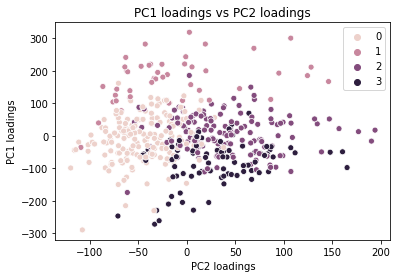

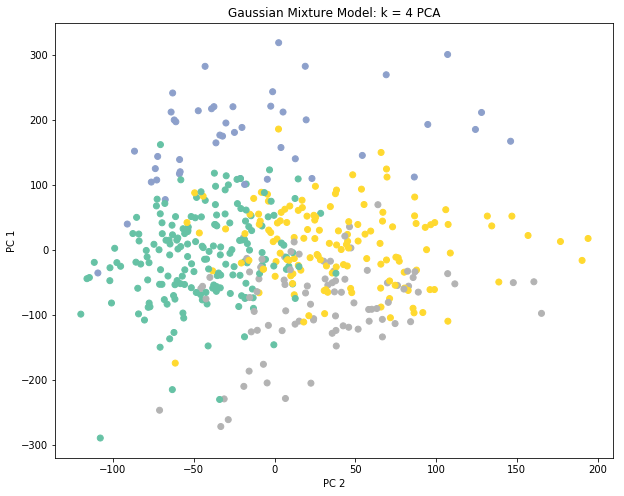

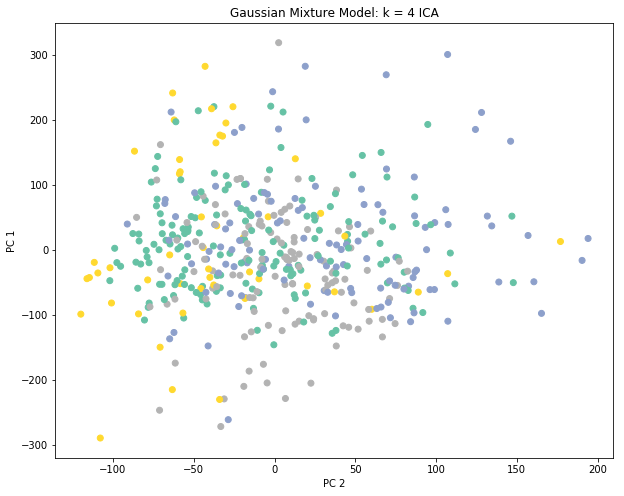

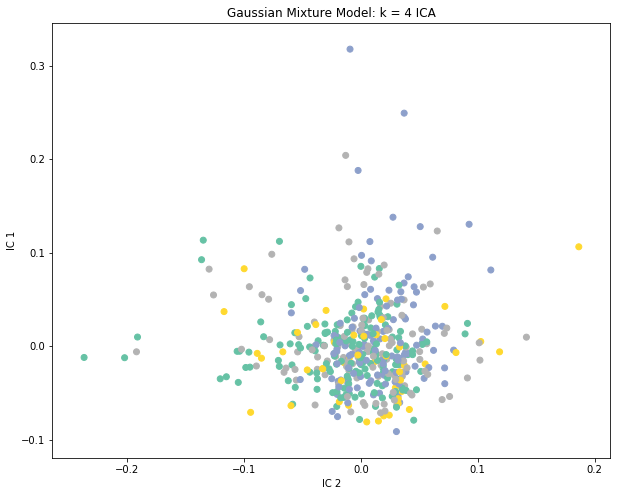

In [83]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = gmm_clustered_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Gaussian Mixture Model: k = 4 PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Gaussian Mixture Model: k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=gmm_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('Gaussian Mixture Model: k = 4 ICA')
plt.show()

#plt.figure(figsize=(10, 8))
#plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_noreduction, cmap='Set2')  # plot points with cluster dependent colors
#plt.xlabel('PC 2')
#plt.ylabel('PC 1')
#plt.title('Gaussian Mixture Model: k = 4 All Samples')
#plt.show()

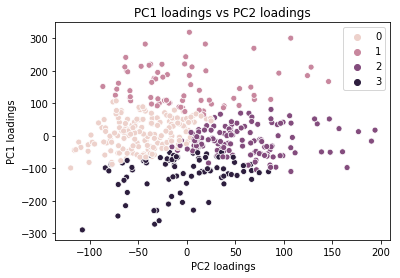

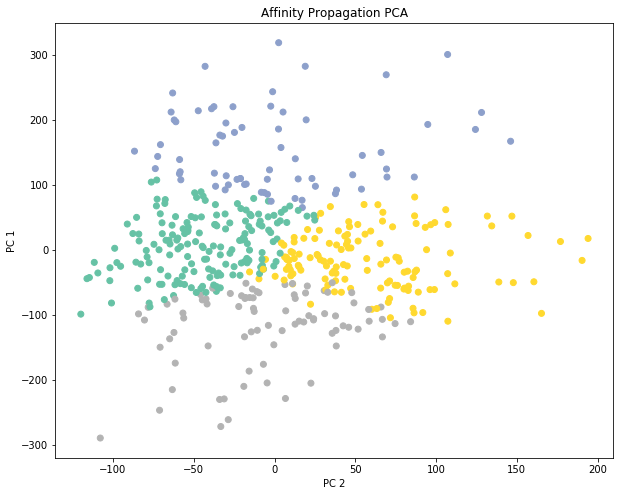

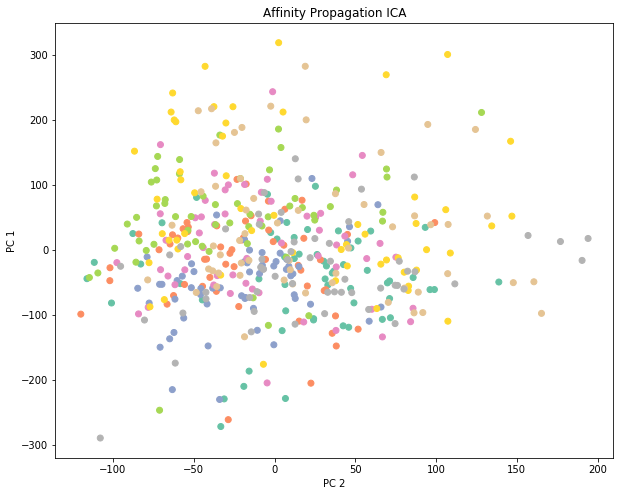

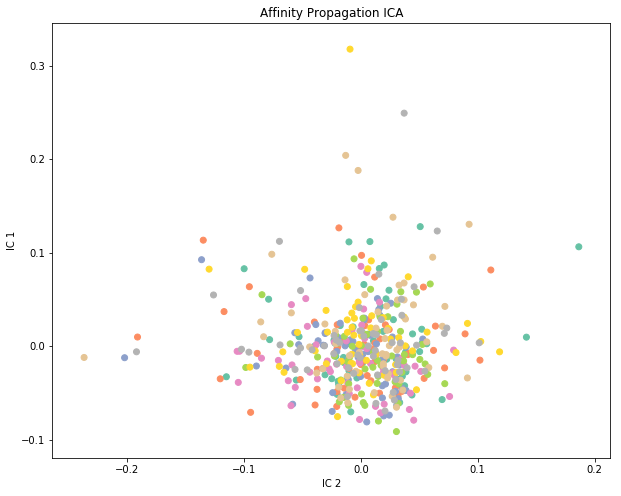

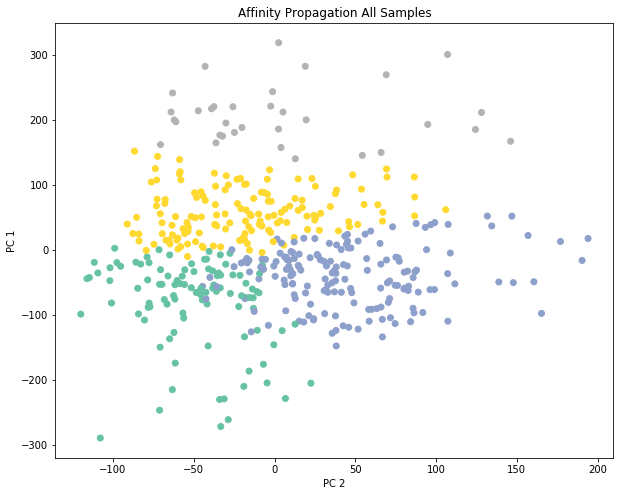

In [93]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = ap_clustered_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation ICA')
plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=ap_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('Affinity Propagation ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_noreduction, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation All Samples')
plt.show()

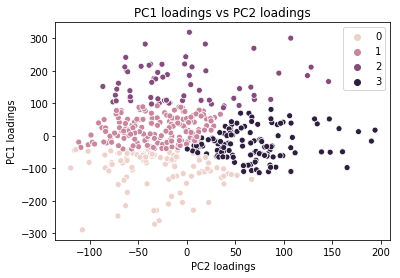

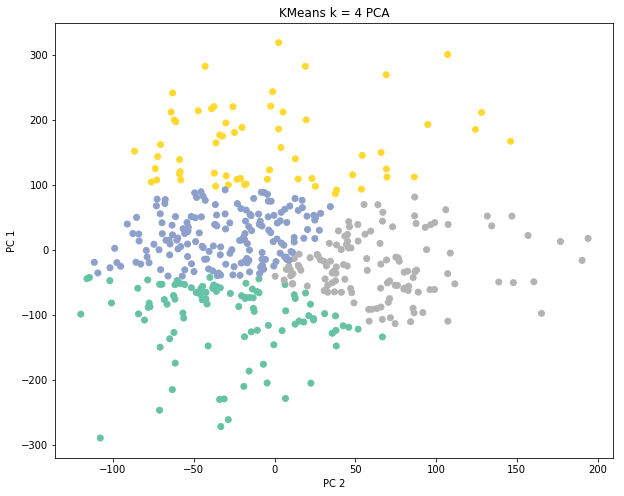

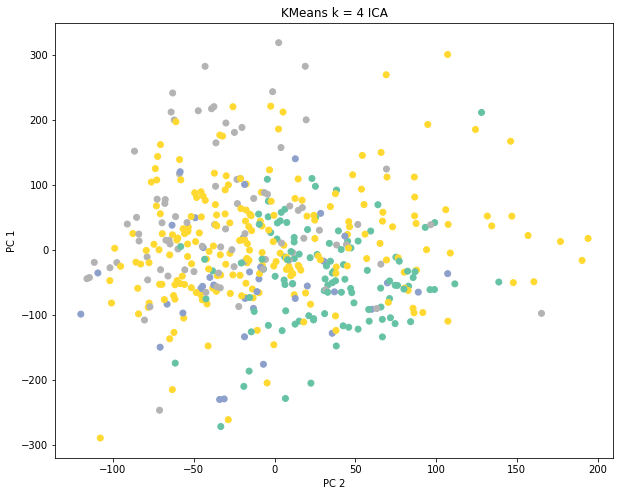

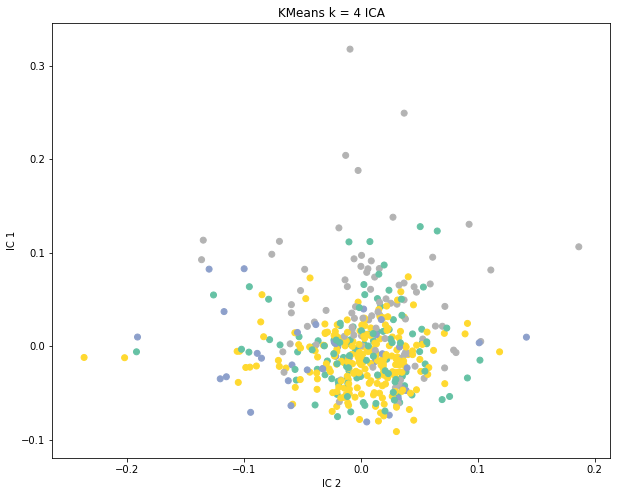

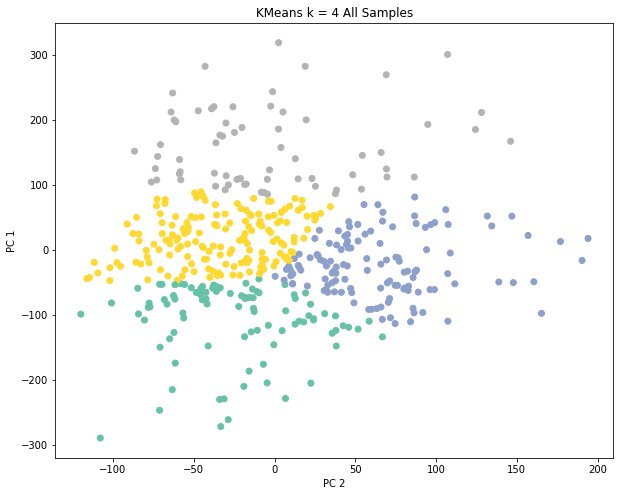

In [94]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = kmeans_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=kmeans_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('KMeans k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_noreduction, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 All Samples')
plt.show()

In [86]:
metadata = pd.read_csv('./EyeGEx_meta_combined_inferior_retina_summary_deidentified.txt',names=['r_id','sample_id', 'os_od',
'age', 'sex', 'mgs_level' ,'rin', 'postmortem_interval_hrs'], delim_whitespace=True, index_col = 0)
metadata = metadata.iloc[1:,:]
metadata = metadata.filter(items=cells, axis=0)
metadata.columns=['sample_id', 'os_od', 'age', 'sex', 'MGS Level' ,'rin', 'postmortem_interval_hrs']
metadata

,sample_id,os_od,age,sex,MGS Level,rin,postmortem_interval_hrs
r_id,,,,,,,
100_2,100,OS,70,F,2,7.4,22.75
101_3,101,OS,94,M,3,7.8,19.48
102_2,102,OD,66,F,2,7.7,22.77
103_3,103,OS,93,F,3,6.7,9.82
104_2,104,OD,80,F,2,7,10.15
105_2,105,OD,80,M,2,7.4,12.5
106_4,106,OS,90,F,4,7.8,15.92
107_4,107,OD,107,F,4,6.4,22.67
109_1,109,OD,81,F,1,7,14.38


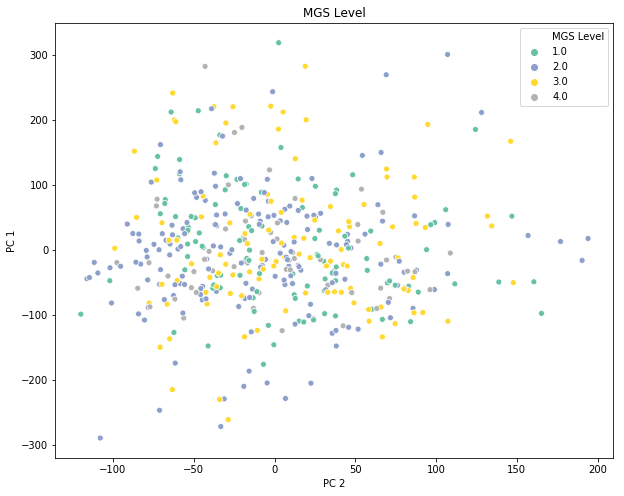

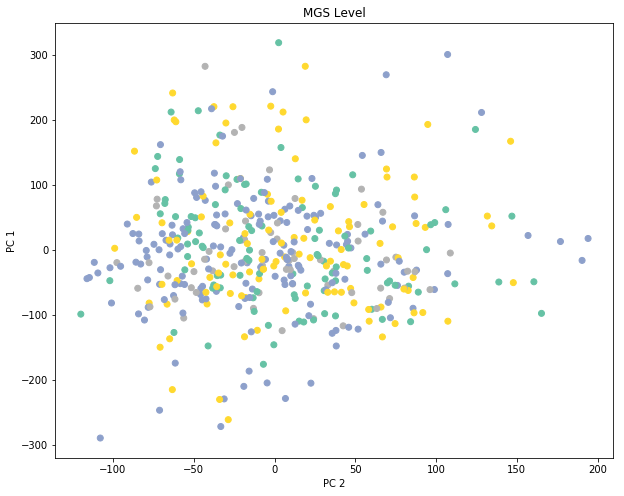

In [87]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 8))
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=metadata['MGS Level'], cmap='Set2')  # plot points with cluster dependent colors
#plt.legend() #metadata['mgs_level'])
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')
plt.show()

Text(0.5,1,'MGS Level')

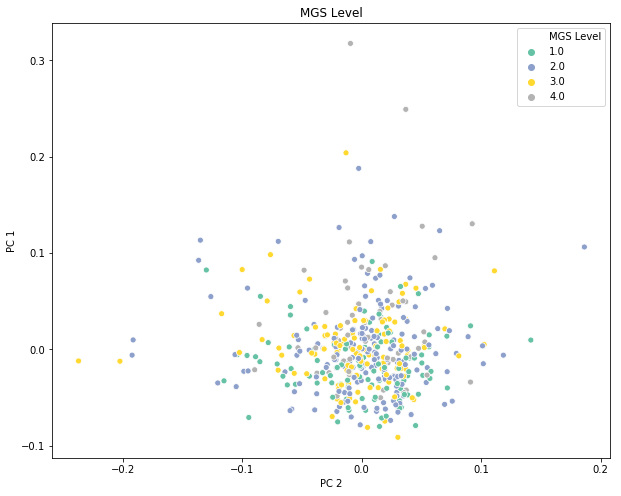

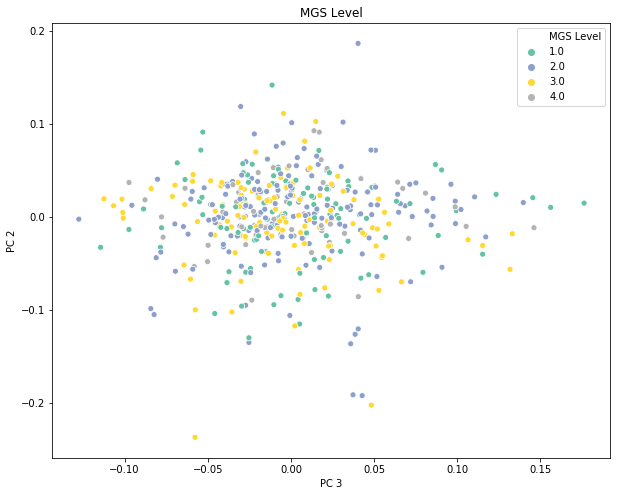

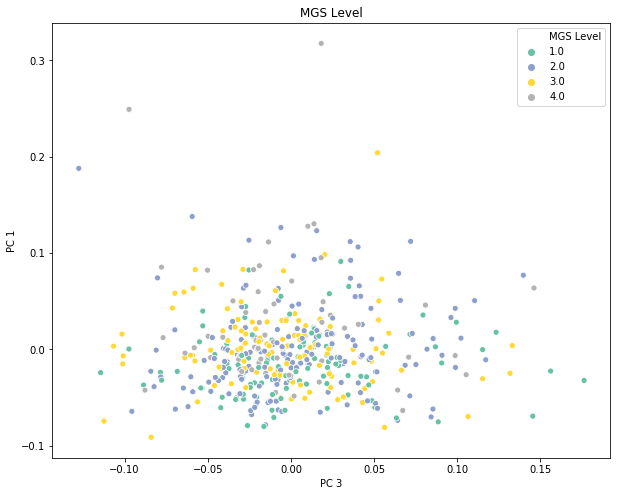

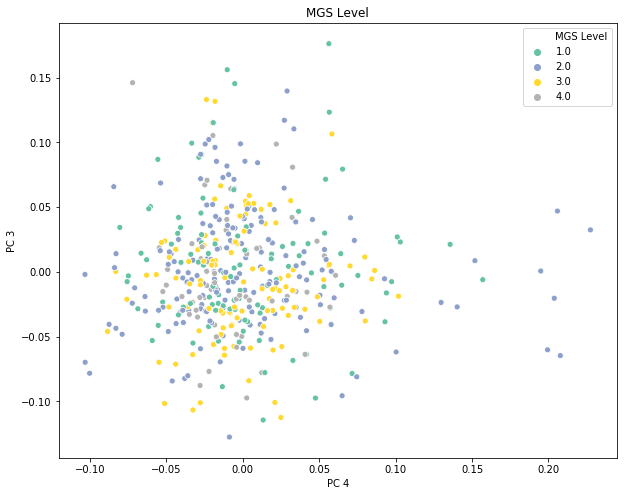

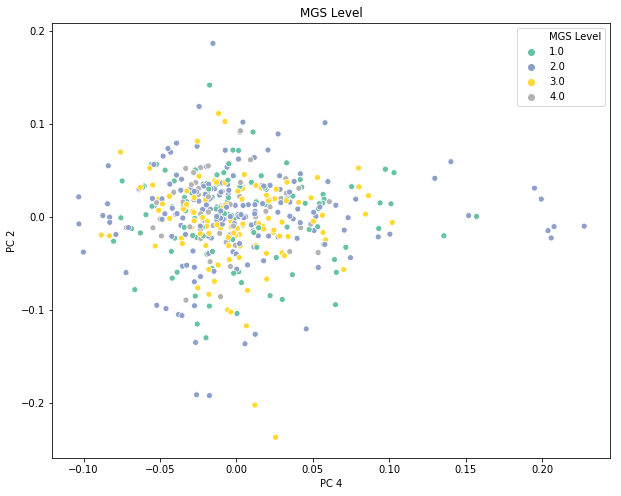

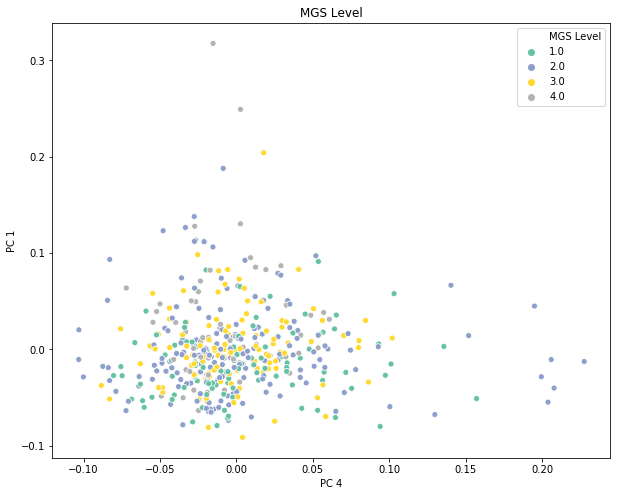

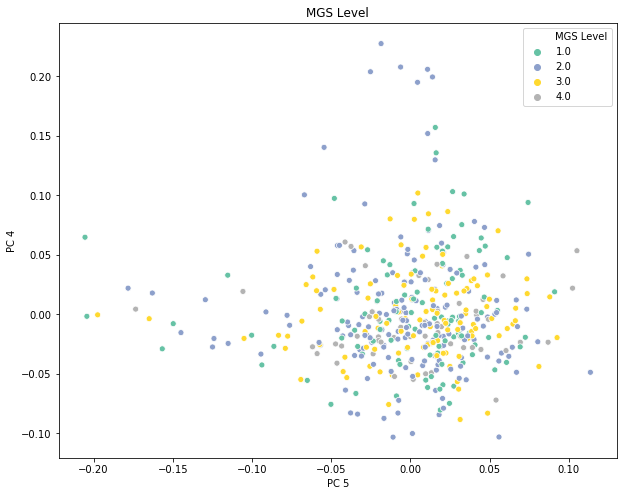

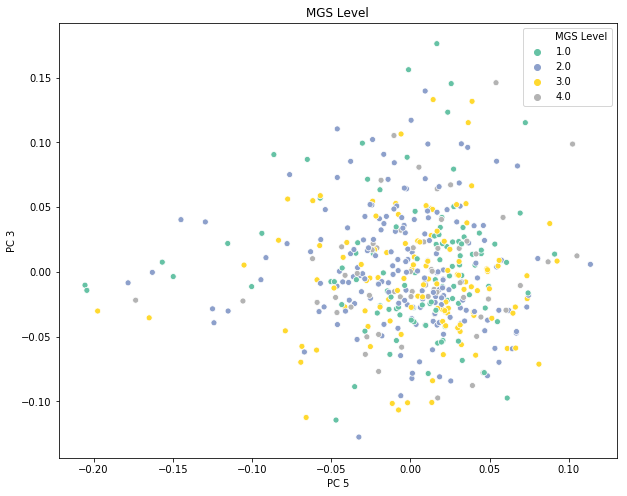

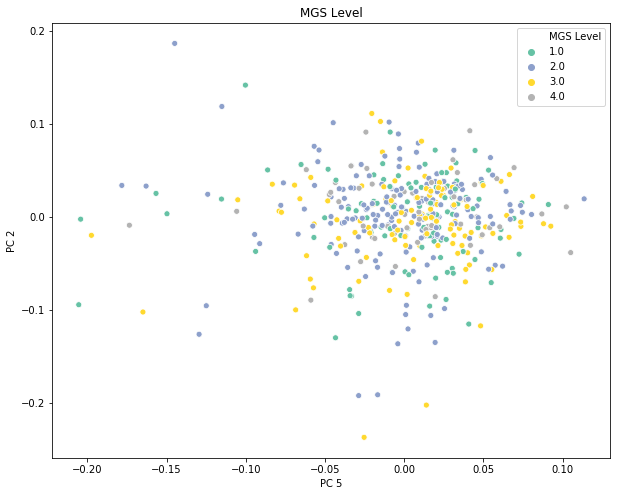

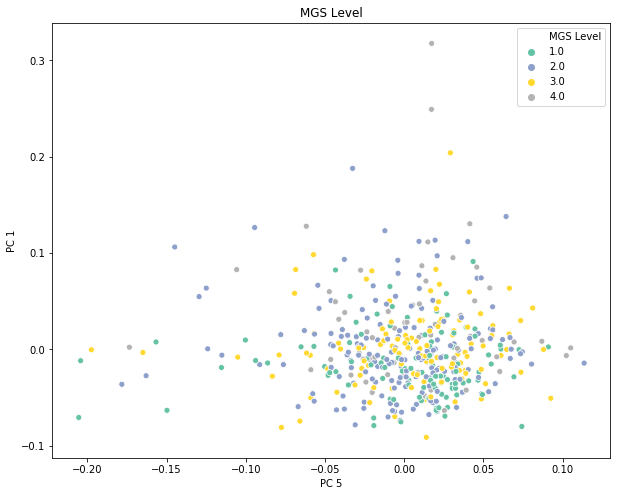

In [95]:


plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 1], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 2], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 3')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 2], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 3')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 2], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 3')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 3], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 4')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 2], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 3')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 1')
plt.title('MGS Level')